# Predicting Campus Placement 

# 1)Acquire the data

In [1]:
import pandas as pd


In [2]:
#read csv file 
csv=pd.read_csv("placement.csv")
csv.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
csv.shape

(215, 14)

In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 16.9+ KB


In [5]:
csv.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
#converting categorial values into numerical values
le=LabelEncoder()
cols=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","etest_p","specialisation","status"]
for i in cols:
    csv[i]=le.fit_transform(csv[i])
csv.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,9,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,74,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,55,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,37,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96,0,55.50,1


In [8]:
import seaborn as sea
import matplotlib.pyplot as plt

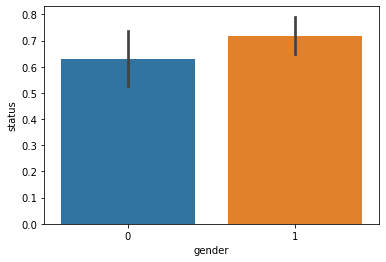

In [9]:
sea.barplot(x="gender",y="status",data=csv)

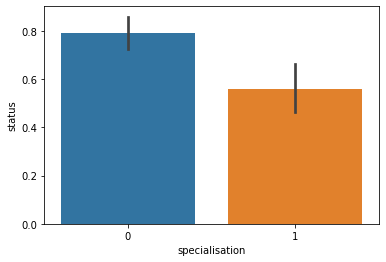

In [10]:
sea.barplot(x="specialisation",y="status",data=csv)

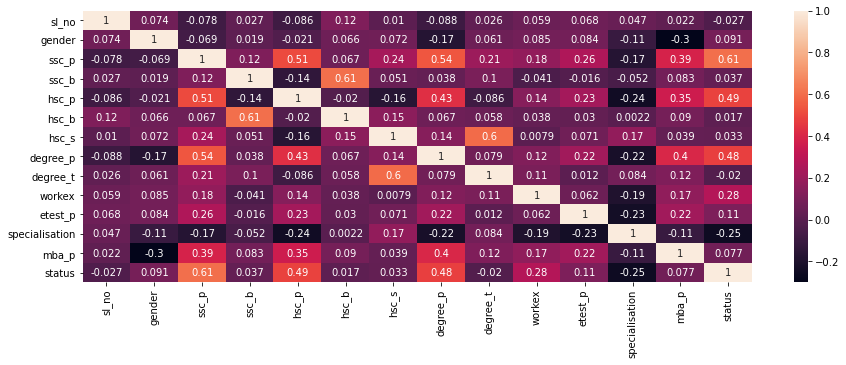

In [11]:
#correlation matrix
plt.figure(figsize=(15,5))
corr=csv.corr()
sea.heatmap(corr,xticklabels=csv.columns,yticklabels=csv.columns,annot=True)


In [12]:
x=csv.drop(["sl_no","status"],axis=1)
y=csv["status"]

# 2)Train the model 

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [15]:
x_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
210,1,80.60,1,82.00,1,1,77.60,0,0,83,0,74.49
190,0,64.00,1,70.20,0,1,61.00,0,0,0,0,62.50
177,0,73.00,0,97.00,1,1,79.00,0,1,80,0,70.81
1,1,79.33,0,78.33,1,2,77.48,2,1,74,0,66.28
198,0,67.00,0,70.00,0,1,65.00,1,0,78,1,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,59.60,0,51.00,0,2,60.00,1,0,55,1,59.08
103,1,73.00,0,78.00,0,2,73.00,2,1,71,1,65.83
67,1,80.92,1,78.50,1,1,67.00,0,0,42,0,60.99
24,1,76.50,1,97.70,1,2,78.86,2,0,98,0,74.01


In [16]:
x_test

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
111,1,51.00,1,54.00,1,2,61.00,2,0,27,1,60.64
127,0,72.00,1,60.00,1,2,69.00,0,0,10,1,58.40
194,1,52.00,1,55.00,1,1,56.30,0,0,25,0,64.74
184,0,56.28,1,62.83,1,1,59.79,0,0,27,1,57.29
169,1,59.96,1,42.16,1,2,61.26,2,0,8,1,65.48
...,...,...,...,...,...,...,...,...,...,...,...,...
28,1,76.76,1,76.50,1,1,67.50,0,1,51,0,64.15
142,1,85.00,0,60.00,1,2,73.43,2,1,27,0,61.29
29,1,62.00,0,67.00,0,1,58.00,0,0,59,0,51.29
99,1,54.00,0,82.00,1,1,63.00,2,0,0,0,59.47


In [17]:
y_train

210    1
190    0
177    1
1      1
198    0
      ..
87     0
103    1
67     1
24     1
8      1
Name: status, Length: 150, dtype: int32

In [18]:
y_test

111    0
127    1
194    0
184    0
169    0
      ..
28     1
142    1
29     0
99     0
40     1
Name: status, Length: 65, dtype: int32

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# 3)Test the model

In [21]:

from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [22]:
#Used RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(x_train,y_train)



In [23]:
rfc_res=rfc.predict(x_test)
print(rfc_res)


[0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


In [24]:
accuracy_score(y_test,rfc_res)

0.8769230769230769

In [25]:
mat=confusion_matrix(y_test,rfc_res)
df=pd.DataFrame(mat,index=["Actual Neg","Actual Pos"],columns=["Pred Neg","Pred Pos"])
df

,Pred Neg,Pred Pos
Actual Neg,17,6
Actual Pos,2,40


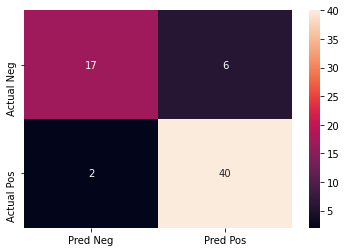

In [26]:
sea.heatmap(df,annot=True)

# 4)Run the model

In [27]:
pred=rfc.predict([[1,88,1,89,0,2,88,1,0,67,1,0]])
pred

array([1])

In [28]:
pred=rfc.predict([[0,43,0,71,0,1,58.09,0,0,67,0,55.89]])
pred

array([1])